<a href="https://colab.research.google.com/github/Jinops/ml-study/blob/main/week05/pre/ch06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols = n if rows == 1 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

In [5]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-05-03 11:56:58--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2023-05-03 11:56:58--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2023-05-03 11:56:59--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443..

(50, 10000)


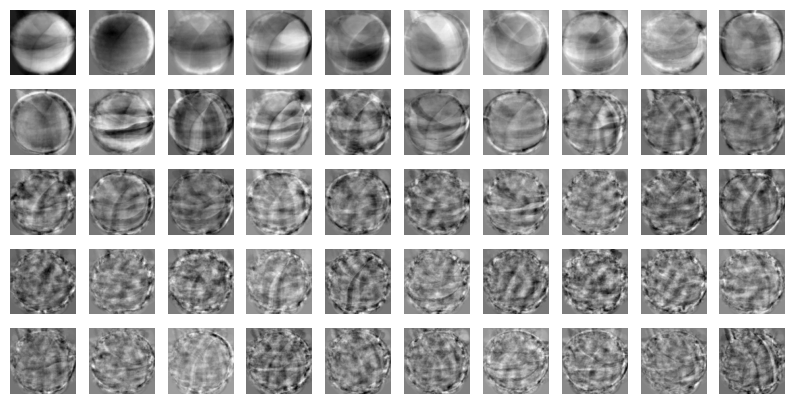

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)
draw_fruits(pca.components_.reshape(-1,100,100))

In [16]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

fruits_inverse = pca.inverse_transform(fruits_pca) #축소
print(fruits_inverse.shape) #복원

(300, 50)
(300, 10000)


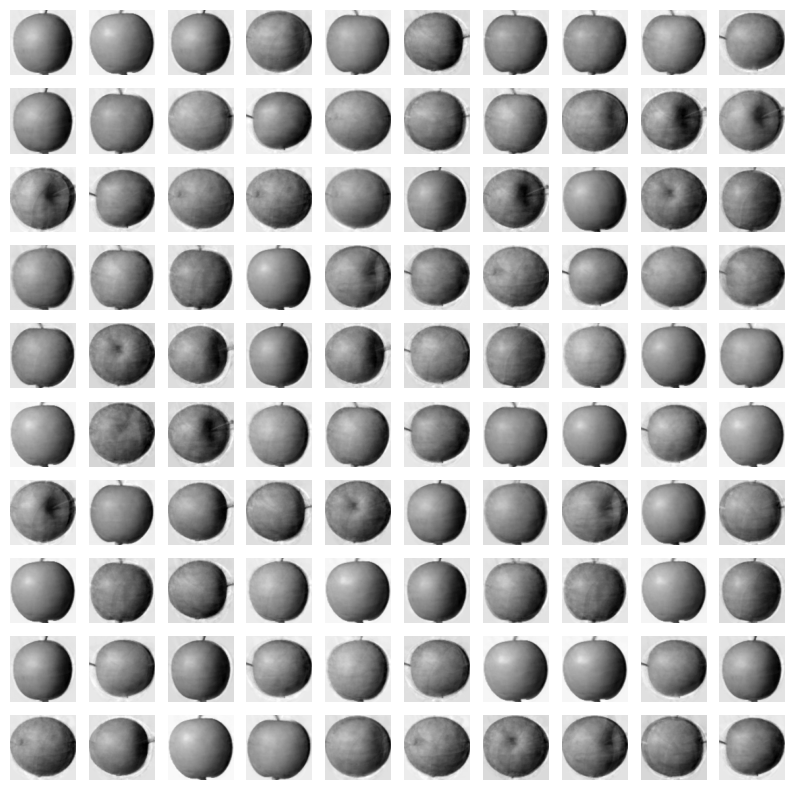

'n


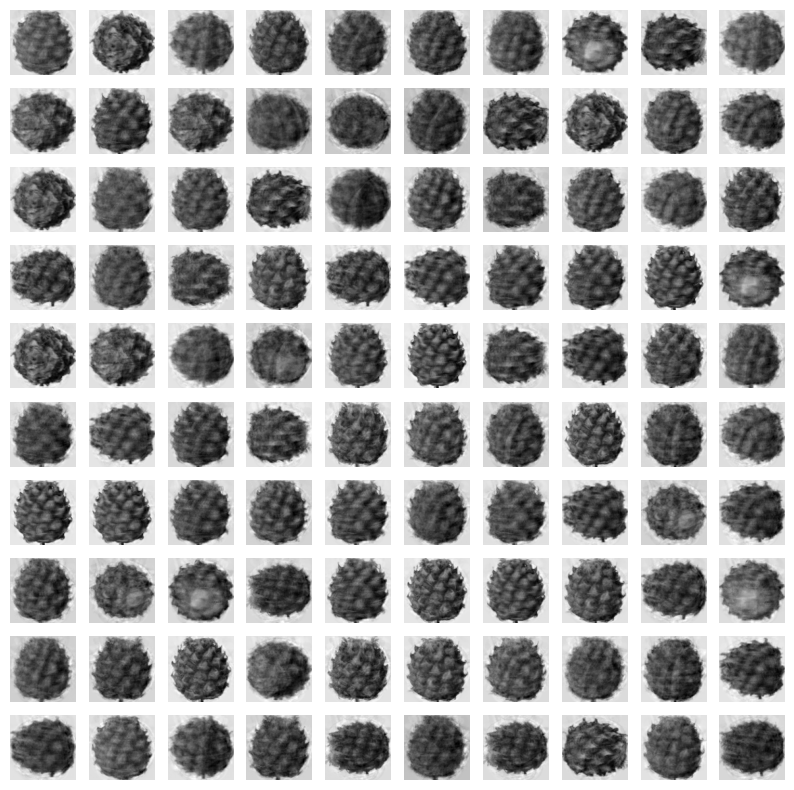

'n


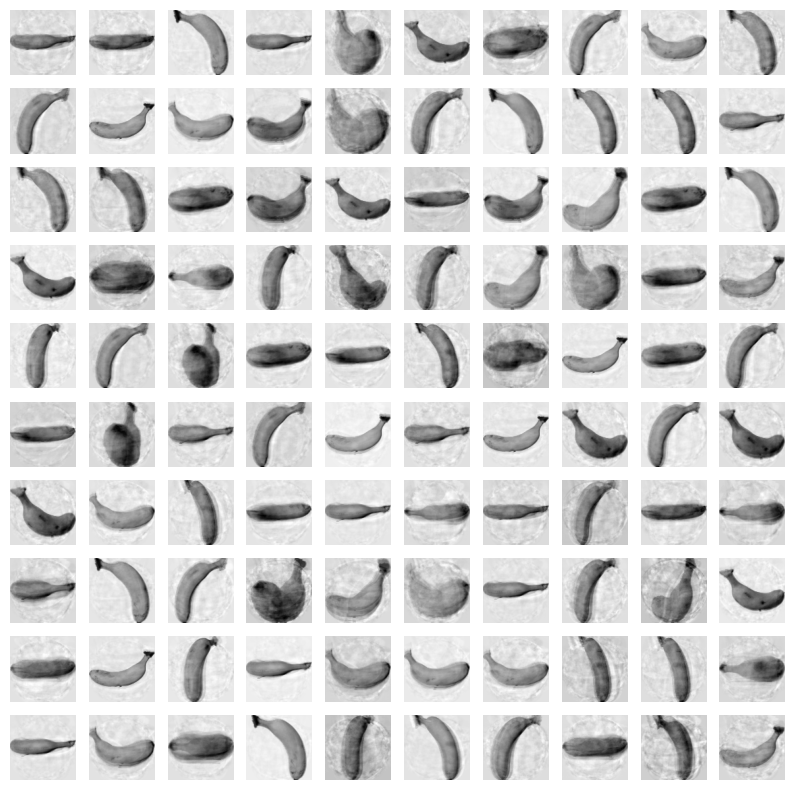

'n


In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\'n')

0.9215371621844364


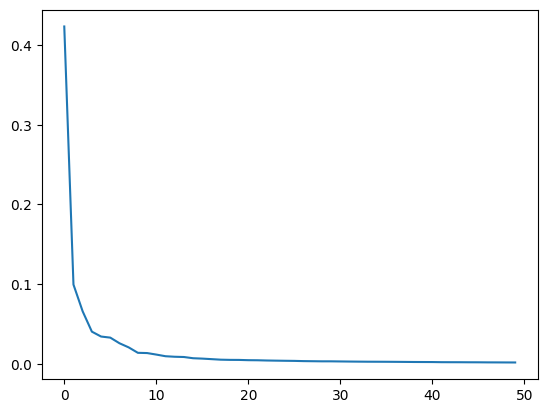

In [20]:
# 설명된 분산: 주성분의 설명된 분산 비율
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

In [24]:
# logistic
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100+[1]*100+[2]*100)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print('성능: ', np.mean(scores['test_score']))
print('시간: ', np.mean(scores['fit_time']))

성능:  0.9966666666666667
시간:  1.5890700817108154


In [25]:
# 차원축소 하면?
scores = cross_validate(lr, fruits_pca, target)
print('성능: ', np.mean(scores['test_score']))
print('시간: ', np.mean(scores['fit_time']))

성능:  1.0
시간:  0.0324521541595459


In [26]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print('주성분(특성) 개수: ', pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
scores = cross_validate(lr, fruits_pca, target)
print('성능: ', np.mean(scores['test_score']))
print('시간: ', np.mean(scores['fit_time']))

주성분(특성) 개수:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


성능:  0.9933333333333334
시간:  0.08529200553894042


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
# k-mean 적용 (비지도)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


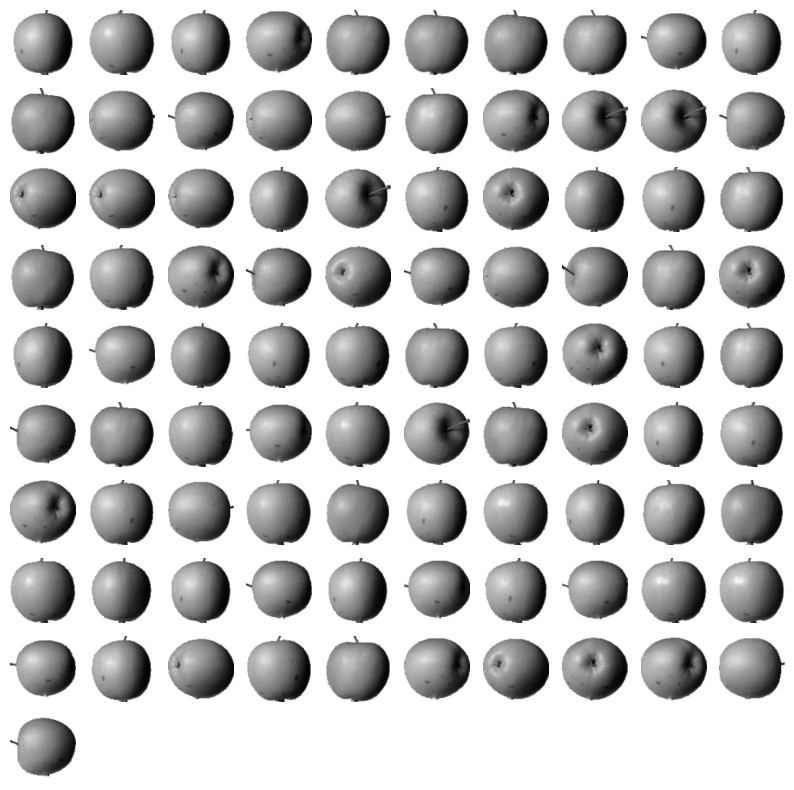

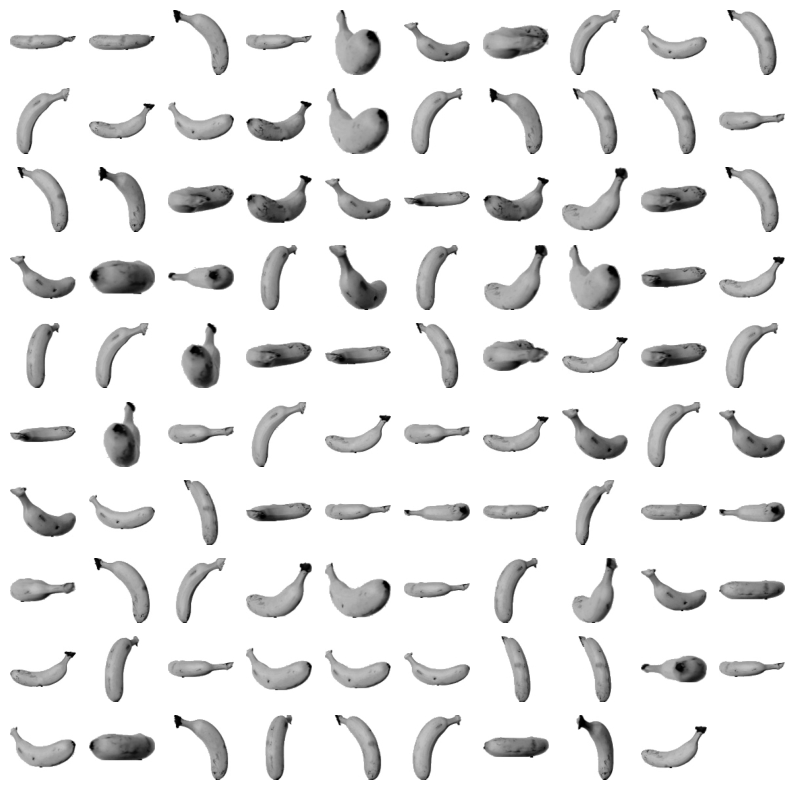

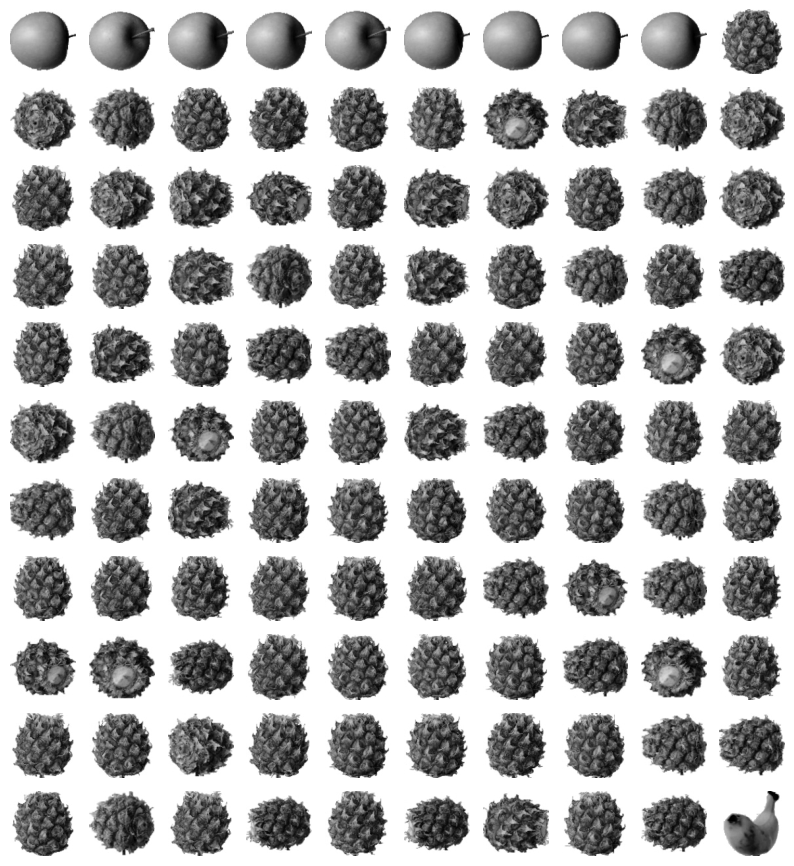

In [31]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print()

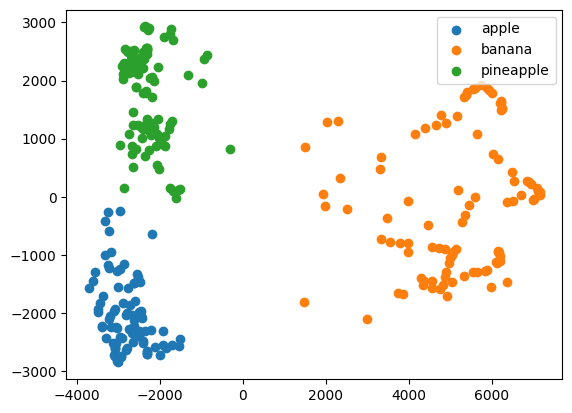

In [33]:
for label in range(0, 3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

# x,y축 숫자가 의미하는 바는?